In [15]:
# change notebook directory to repo root
%cd C:\\Users\\1699\\Repositories\\ai_results_viz
%matplotlib inline

C:\Users\1699\Repositories\ai_results_viz


In [16]:
from C51_HPO.import_csv import *
from plot_results_binary import calculate_cf_matrix, plot_cf_matrix
from pathlib import Path
from IPython.display import Image

# Load data

In [17]:
# import data
path = Path(r'C:\Users\1699\Repositories\ai_results_viz\C51_HPO\test_scores.csv')
test_scores_df = load_test_scores(path)
test_scores_df

,img,scores,truth,sample,revolution,sequence,prediction
0,gut/gut_1.0000___Production_LCS0K01_FErun1_G18...,[9.999850e-01 5.740729e-06 9.271215e-06],0,Production_LCS0K01_FErun1_G18,20,13,0
1,gut/gut_1.0000___loop_bad_140201_D_seq_00031_I...,[0.8966866 0.08401702 0.01929635],0,loop_bad_140201_D,31,10,0
2,gut/gut_1.0000___loop_bad_140705_E_seq_00019_I...,[0.715376 0.2461782 0.03844582],0,loop_bad_140705_E,19,8,0
3,gut/gut_1.0000___Deviation_140701w2-r1_G18n_se...,[0.8995745 0.04602931 0.05439622],0,Deviation_140701w2-r1_G18n,107,5,0
4,gut/gut_1.0000___loop_bad_KDS1M02_seq_00019_Im...,[0.9177625 0.04874269 0.03349485],0,loop_bad_KDS1M02,19,6,0
...,...,...,...,...,...,...,...
11438,kratzer/kratzer_1.0000___loop_bad_140705_B_seq...,[8.1849337e-04 4.7858851e-08 9.9918145e-01],2,loop_bad_140705_B,28,10,2
11439,kratzer/kratzer_1.0000___loop_bad_140705_B_seq...,[7.1969805e-11 2.8575784e-11 1.0000000e+00],2,loop_bad_140705_B,11,12,2
11440,kratzer/kratzer_1.0000___loop_bad_140705_B_seq...,[1.0953466e-10 1.9801638e-08 1.0000000e+00],2,loop_bad_140705_B,7,6,2
11441,kratzer/kratzer_1.0000___Scratches_loop_140705...,[1.0039251e-08 1.0341216e-11 1.0000000e+00],2,Scratches_loop_140705_F1_G18,3,13,2


# Image based evaluation

In [18]:
# creating confusion matrix
y_true = test_scores_df.truth
y_pred = test_scores_df.prediction
cls_dict = {'Gut': 0, 'Kratzer': 1, 'Luftlinie': 2}
clss = ['Gut', 'Kratzer', 'Luftlinie']
cf_matrix = calculate_cf_matrix(y_true, y_pred, cls_dict, clss)

In [19]:
# plotting and saving confusion matrix
save_path_cf_matrix = Path(r'C:\Users\1699\Repositories\ai_results_viz\C51_HPO\image_based_cf_matrix.png')
plot_cf_matrix(cf_matrix, save_path_cf_matrix, clss)


<Figure size 640x480 with 0 Axes>

<img src="Image_based_cf_matrix.png" alt="sample based confusion matrix" />

In [20]:
# create sample dict
sample_dict = {}
categories = test_scores_df.truth.unique()
category_dict = {val: key for key, val in cls_dict.items()}
for category in categories:
    filtered_df = test_scores_df[test_scores_df['truth'] == category]
    sample_dict[category_dict[category]] = filtered_df['sample'].unique()
    

In [21]:
def convert_test_scores_to_sample_scores(scores_df, csv_save_path):
    df = scores_df.copy()
    grouped_df = df.groupby(['sample','revolution'])
    predictions = grouped_df['prediction'].max()
    sample_truths = grouped_df['truth'].first()
    max_sample_scores = pd.concat([predictions, sample_truths], axis=1)
    max_sample_scores.to_csv(csv_save_path)
    return max_sample_scores

In [22]:
save_path_sample_based_csv= Path(r'C:\Users\1699\Repositories\ai_results_viz\C51_HPO\sample_based_test_scores.csv')
sample_test_scores_df = convert_test_scores_to_sample_scores(test_scores_df, save_path_sample_based_csv)
sample_test_scores_df

prediction  truth
sample                    revolution                   
Airline_loop_bad_140705_A 1                    1      0
                          2                    1      0
                          3                    1      1
                          4                    1      0
                          5                    1      0
...                                          ...    ...
loop_bad_KHS0D00          19                   0      0
                          20                   0      0
                          21                   0      0
                          22                   0      0
                          26                   0      0

[1994 rows x 2 columns]

In [23]:
# creating confusion matrix
y_true = sample_test_scores_df.truth
y_pred = sample_test_scores_df.prediction
cls_dict = {'Gut': 0, 'Kratzer': 1, 'Luftlinie': 2}
clss = ['Gut', 'Kratzer', 'Luftlinie']
cf_matrix = calculate_cf_matrix(y_true, y_pred, cls_dict, clss)

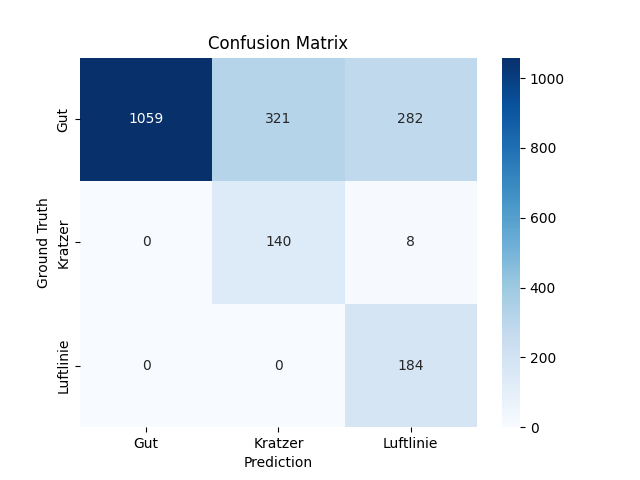

<Figure size 640x480 with 0 Axes>

In [24]:
# plotting and saving confusion matrix
save_path_cf_matrix = Path(r'C:\Users\1699\Repositories\ai_results_viz\C51_HPO\sample_based_cf_matrix.png')
plot_cf_matrix(cf_matrix, save_path_cf_matrix, clss)
Image(filename=save_path_cf_matrix) 